In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1. Carregar o dataset MNIST
# O Keras já vem com o MNIST pré-carregado e dividido em treino e teste
# https://medium.com/@binaya.puri/mnist-dataset-for-machine-learning-8987e0b20bb3
print("Carregando o dataset MNIST...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


Carregando o dataset MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 


In [4]:
# Exibir as dimensões dos dados
print(f"Dimensões dos dados de treino: Imagens={x_train.shape}, Rótulos={y_train.shape}")
print(f"Dimensões dos dados de teste: Imagens={x_test.shape}, Rótulos={y_test.shape}")


Dimensões dos dados de treino: Imagens=(60000, 28, 28), Rótulos=(60000,)
Dimensões dos dados de teste: Imagens=(10000, 28, 28), Rótulos=(10000,)


In [5]:
# O dataset MNIST consiste em 60.000 imagens de treino e 10.000 imagens de teste.
# Cada imagem tem 28x28 pixels.

# 2. Pré-processar os dados
# Normalizar as imagens: converter os valores de pixel de [0, 255] para [0, 1]
# Isso ajuda o modelo a aprender melhor
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("\nDados pré-processados (normalizados para 0-1).")



Dados pré-processados (normalizados para 0-1).


In [6]:
# 3. Construir o modelo da Rede Neural
# Usaremos um modelo Sequencial, que é uma pilha linear de camadas
model = tf.keras.models.Sequential([
    # A camada Flatten transforma a imagem 28x28 em um vetor 1D de 784 pixels
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    # Uma camada Dense (totalmente conectada) com 128 neurônios e ativação ReLU
    # ReLU (Rectified Linear Unit) é uma função de ativação comum para camadas ocultas
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Uma camada de Dropout para evitar overfitting (descarta aleatoriamente 20% dos neurônios)
    tf.keras.layers.Dropout(0.2),
    
    # Camada de saída Dense com 10 neurônios (um para cada dígito de 0 a 9)
    # A ativação Softmax garante que a saída seja uma distribuição de probabilidade
    # Ou seja, a soma de todas as saídas será 1, indicando a probabilidade de cada dígito
    tf.keras.layers.Dense(10, activation='softmax')
])


In [7]:
# 4. Compilar o modelo
# Configurar o otimizador, a função de perda e as métricas para avaliação
model.compile(optimizer='adam', # 'adam' é um otimizador popular e eficiente
              loss='sparse_categorical_crossentropy', # Perda para classificação multi-classe com rótulos inteiros
              metrics=['accuracy']) # Métrica para acompanhar durante o treinamento
0
print("\nModelo de Rede Neural construído e compilado:")
model.summary() # Exibe um resumo da arquitetura do modelo



Modelo de Rede Neural construído e compilado:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 5. Treinar o modelo
print("\nIniciando o treinamento do modelo...")
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
# epochs=5 significa que o modelo passará por todo o dataset de treino 5 vezes.
# validation_data é usado para avaliar o modelo em dados de teste após cada época.

print("\nTreinamento concluído.")



Iniciando o treinamento do modelo...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9120 - loss: 0.3037 - val_accuracy: 0.9590 - val_loss: 0.1404
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9573 - loss: 0.1441 - val_accuracy: 0.9694 - val_loss: 0.1025
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9673 - loss: 0.1096 - val_accuracy: 0.9745 - val_loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9733 - loss: 0.0889 - val_accuracy: 0.9751 - val_loss: 0.0779
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9764 - loss: 0.0750 - val_accuracy: 0.9776 - val_loss: 0.0778

Treinamento concluído.


In [9]:
# 6. Avaliar o desempenho do modelo
print("\nAvaliação final do modelo nos dados de teste:")
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Perda no conjunto de teste: {loss:.4f}")
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")



Avaliação final do modelo nos dados de teste:
313/313 - 0s - 1ms/step - accuracy: 0.9776 - loss: 0.0778
Perda no conjunto de teste: 0.0778
Acurácia no conjunto de teste: 0.9776



Fazendo previsões para as primeiras 5 imagens de teste:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


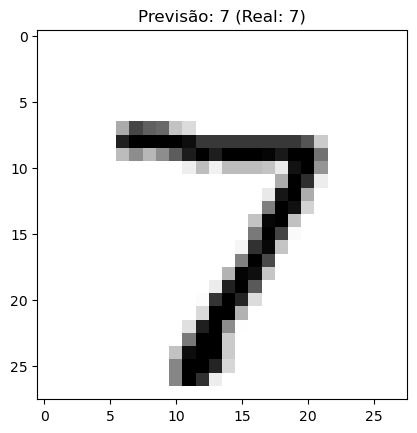

Probabilidades: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
------------------------------


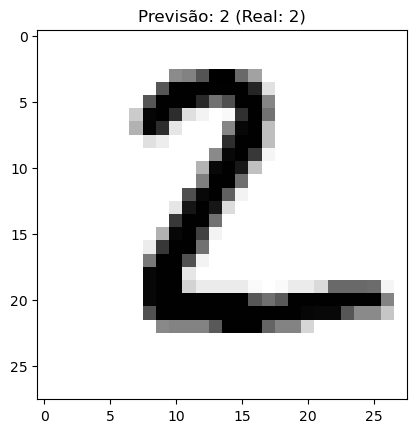

Probabilidades: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------------------------------


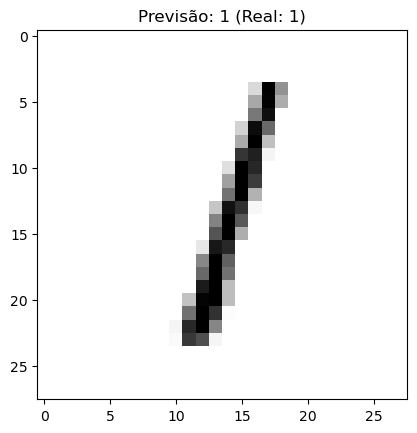

Probabilidades: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------


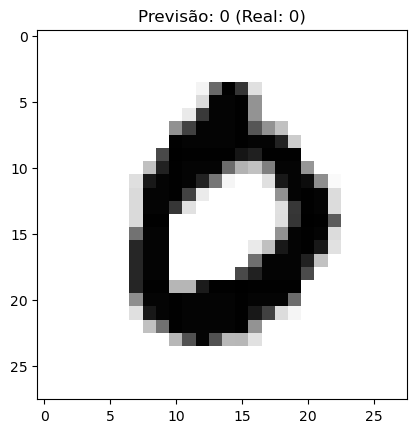

Probabilidades: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------


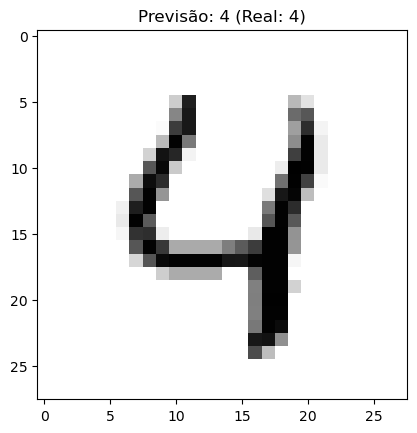

Probabilidades: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------


In [10]:
# 7. Fazer previsões
print("\nFazendo previsões para as primeiras 5 imagens de teste:")
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Previsão: {predicted_classes[i]} (Real: {y_test[i]})")
    plt.show()
    print(f"Probabilidades: {np.round(predictions[i], 2)}")
    print("-" * 30)